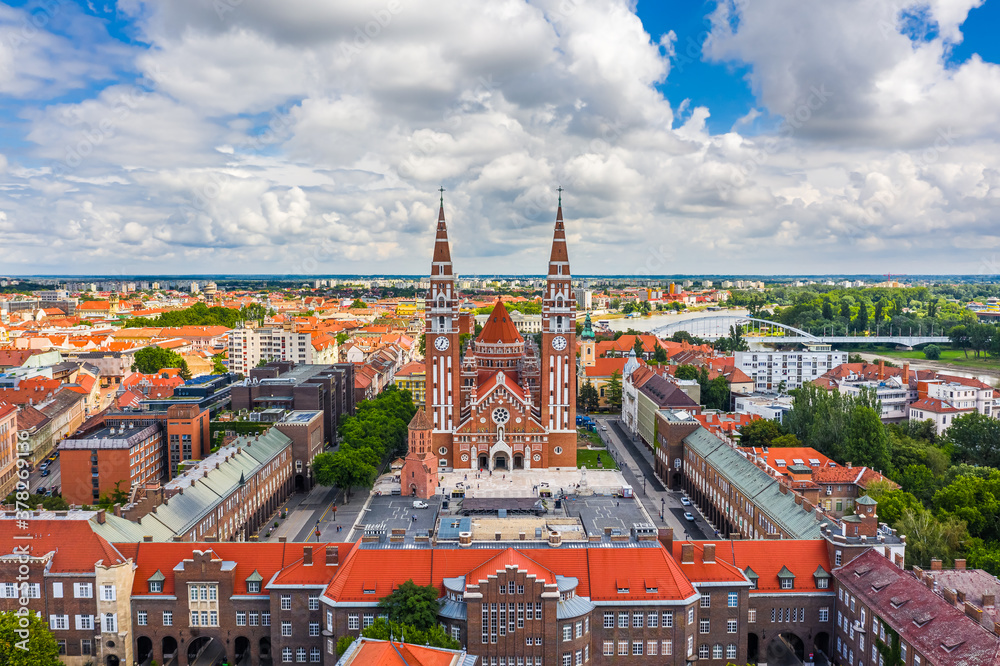

In [197]:
Image(filename='szeged_sunny.jpeg', width=1000, height=0)

# Weather in Szeged

## Table of Contents

1. [Project Overview](#1.-Project-Overview)
2. [Importing Packages](#2.-Importing-Packages)
3. [Loading Data](#3.-Loading-Data)
4. [Data Cleaning and Filtering](#4.-Data-Cleaning-and-Filtering)
5. [Exploratory Data Analysis](5.-Exploratory-Data-Analysis)
   - [Daily Average Temperature over time](#5.1-Daily-Average-Temperature-over-time)
   - [Temperature versus Apparent Temperature over time](#5.2-Temperature-versus-Apparent-Temperature-over-time)
   - [Daily Humidity Trends](#5.3-Daily-Humidity-Trends)
   - [Daily Wind Speed Trends](#5.4-Daily-Wind-Speed-Trends)
   - [Distribution of Wind Directions](#5.5-Distribution-of-Wind-Directions)
   - [Daily Visibilty Trends](#5.6-Daily-Visibilty-Trends)
   - [Daily Pressure Trends](#5.7-Daily-Pressure-Trends)
   - [Frequency of precipitation types](#5.8-Frequency-of-precipitation-types)
6. [Model Training](6.-Model-Training)
   - [Standardizing Data](6.1-Standardizing-Data)
   - [Model 1: Ridge Regression](6.2-Model-1:-Ridge-Regression)
   - [Model 2: Decision Tree](6.3-Model-2:-Decision-Tree)
     - [Without pipeline](6.3.1-Without-pipeline)
   - [Model 3: Support Vector Regression](6.4-Model-3:-Support-Vector-Regression)
   - [Model 4: Stacking Ensemble](6.5-Model-4:-Stacking-Ensemble)
7. [Conclusion & Insights](7.-Conclusion-&-Insights)
8. [References](#7.-References)

## 1. Project Overview

Szeged is the third largest city of Hungary, a country in Europe. The city played a crucial role in Hungarian history, especially after the Great Flood of 1879, which destroyed much of Szeged. It was rebuilt with a modern city plan, giving it the wide boulevards and elegant architecture that is seen today. It is known for its Iconic Architecture such as the **Votive Church of Szeged (Szegedi Dóm)**; a neo-Romanesque cathedral that dominates the city skyline, **Reök Palace**; A stunning example of Hungarian Art Nouveau architecture and the **Dóm Square**; where one of the city's most famous festivals **Szeged Open-Air** Festival is hosted. Szeged is often called the *City of Sunshine* due to its high number of sunny days compared to other Hungarian cities.

For this project, we want to investigate what influences the weather in Szeged. We have historical weather data from 2006 to 2016 and we want to find out what factors affect the weather in Szeged.

## 2. Importing Packages

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from IPython.display import Image

## 3. Loading Data

In [127]:
weather_data = pd.read_csv('cleaned_weatherHistory.csv')
data = weather_data
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2


## 4. Data Cleaning and Filtering

From the raw data above, we can see that the raw dataset consists of time-related data. We would like to clean this data up for future analysis. We want to check for missing values, duplicates, as well as rename the columns for ease of use. It would also be useful to clean up the datetime columns for modelling purposes.

In [128]:
# Converting 'Formatted Date' to datetime
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

# Extracting useful information from the datetime column
data['Year'] = data['Formatted Date'].dt.year
data['Month'] = data['Formatted Date'].dt.month
data['Day'] = data['Formatted Date'].dt.day
data['Hour'] = data['Formatted Date'].dt.hour


# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Drop rows with missing values
data = data.dropna()

# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nDuplicates: {duplicates}")

# Droppping duplicates
data = data.drop_duplicates()

data.rename(columns={'Loud Cover': 'Cloud Cover'}, inplace=True)

# Saving the cleaned dataset to a new file
data.to_csv('cleaned_weatherHistory.csv', index=False)

print("\nCleaned Data:")
print(data.head())


Missing Values:
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Cloud Cover                 0
Pressure (millibars)        0
Daily Summary               0
Year                        0
Month                       0
Day                         0
Hour                        0
dtype: int64

Duplicates: 0

Cleaned Data:
             Formatted Date        Summary Precip Type  Temperature (C)   
0 2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222  \
1 2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
3 2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   

   Appare

The raw dataset consists of no missing values nor duplicates. We renamed some of the columns and we added some temporal features (Year, Month, Day, Hour) from the 'Formatted Date' column

In [ ]:
data.info()

## 5. Exploratory Data Analysis

In [129]:
# Convert 'Formatted Date' to datetime and set it as the index
weather_data = data
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'])
weather_data.set_index('Formatted Date', inplace=True)

### 5.1 Daily Average Temperature over time

In [130]:
# Resample to daily average temperature
daily_temp = weather_data['Temperature (C)'].resample('D').mean()

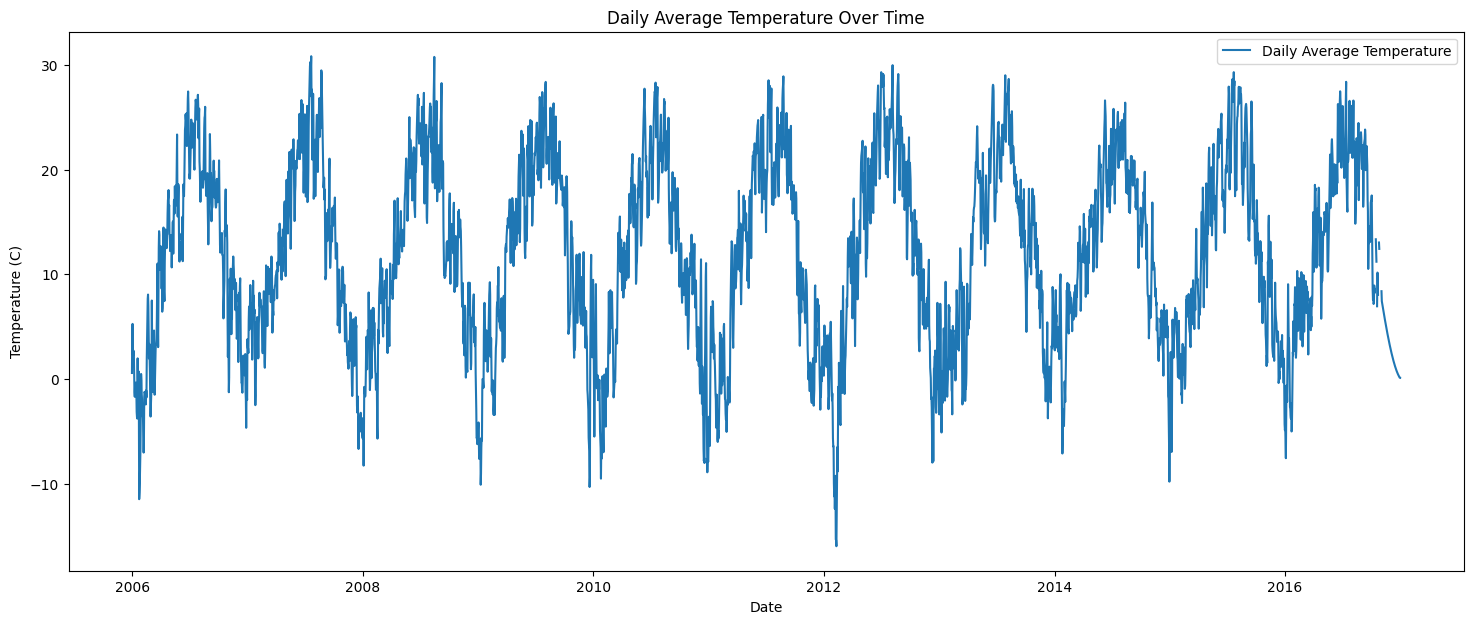

In [131]:
# Plot the daily temperature
plt.figure(figsize=(18, 7))
plt.plot(daily_temp, label='Daily Average Temperature')
plt.title('Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

In [132]:
# Display basic statistics
daily_temp.describe()

count    4009.000000
mean       11.935768
std         8.797238
min       -15.958796
25%         5.004630
50%        12.220370
75%        19.196296
max        30.814352
Name: Temperature (C), dtype: float64

Count: 4009 days of data.
Mean: 11.94°C
Min/Max: Ranges from -15.96°C to 30.81°C.
Standard Deviation: 8.80°C, indicating moderate variability

The weather in Szeged over the 10 year period (2006-2010) ranges between -15.96°C to 30.81°C. This means that the although the summer season tends to be quite warm, it can get freezingly cold (up to -15.96°C) during the winter season.

### 5.2 Temperature versus Apparent Temperature over time

Temperature: is the measure of the warmth or coldness of the air around us, typically measured with a thermometer. It refers to the actual ambient air temperature at a given location and time, regardless of other factors like wind or humidity.

Apparent Temperature: is how the temperature feels to the human body when wind and humidity are factored in. On windy days, the wind can make the air feel cooler than the actual air temperature. Wind removes heat from the body more quickly, which makes it feel colder.

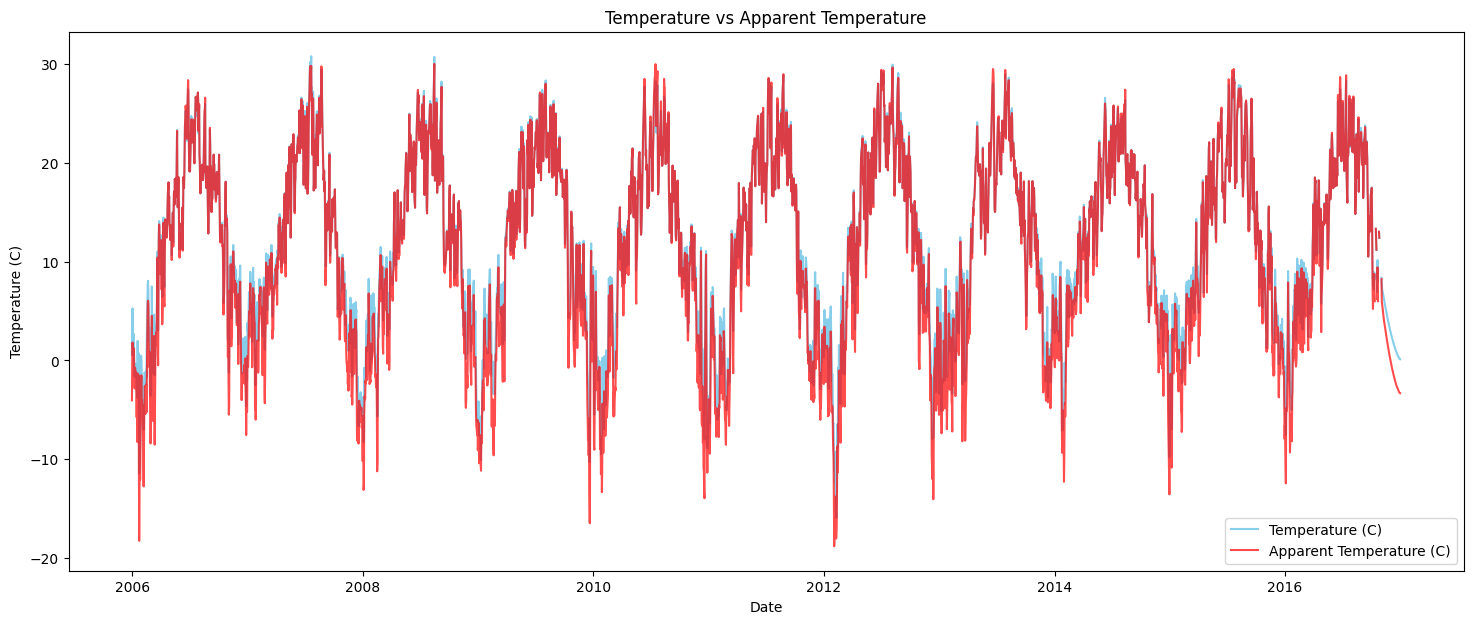

In [133]:
# Plot Temperature vs. Apparent Temperature
plt.figure(figsize=(18, 7))
plt.plot(daily_temp, label='Temperature (C)', color='skyblue')
plt.plot(weather_data['Apparent Temperature (C)'].resample('D').mean(), label='Apparent Temperature (C)', alpha=0.7, color='red')
plt.title('Temperature vs Apparent Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

From the plot above, we can see the there is very little difference between the temperature and the apparent temperature. This means that 9 times out of 10, the temperature you feel on your body whilst ouside is the actual temeparature outside when you are in Szeged.

### 5.3 Daily Humidity Trends

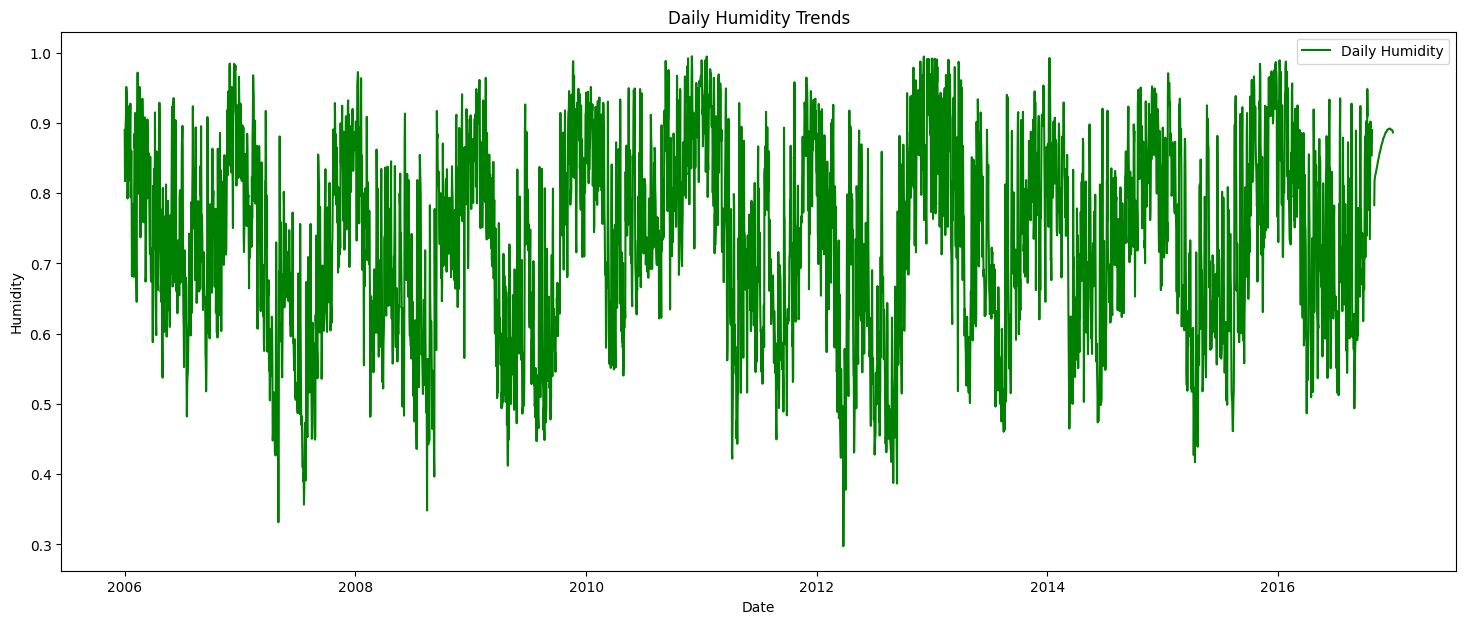

In [134]:
# Plot humidity trends
daily_humidity = weather_data['Humidity'].resample('D').mean()
plt.figure(figsize=(18, 7))
plt.plot(daily_humidity, label='Daily Humidity', color='green')
plt.title('Daily Humidity Trends')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend()
plt.show()

In [135]:
# Correlation with Temperature
correlation = daily_temp.corr(daily_humidity)
print(f"Correlation between Temperature and Humidity: {correlation:.2f}")

Correlation between Temperature and Humidity: -0.59


There's a moderate negative correlation, this indicates that as temperature increases humidity tends to decrease.

### 5.4 Daily Wind Speed Trends

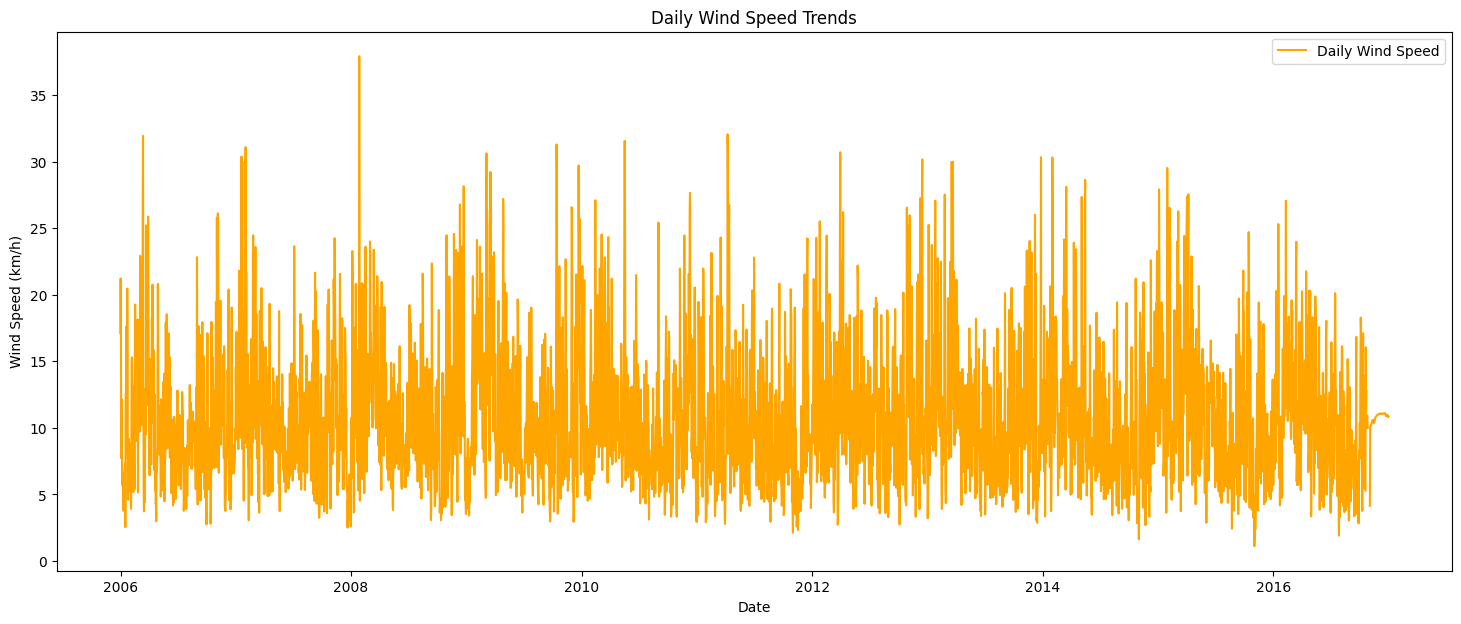

In [136]:
# Plot Wind Speed trends
daily_wind_speed = weather_data['Wind Speed (km/h)'].resample('D').mean()
plt.figure(figsize=(18, 7))
plt.plot(daily_wind_speed, label='Daily Wind Speed', color='orange')
plt.title('Daily Wind Speed Trends')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.show()

In [137]:
# Correlation with Temperature
correlation_wind = daily_temp.corr(daily_wind_speed)
print(f"Correlation between Temperature and Wind Speed: {correlation_wind:.2f}")

Correlation between Temperature and Wind Speed: -0.14


There is very weak negative correlation, there is a slight tendency for higher temperatures to be associated with lower wind speeds, but the relationship is very weak and almost negligible. Wind speed does not play a significant role in explaining variations in temperature in this dataset.

### 5.5 Distribution of Wind Directions

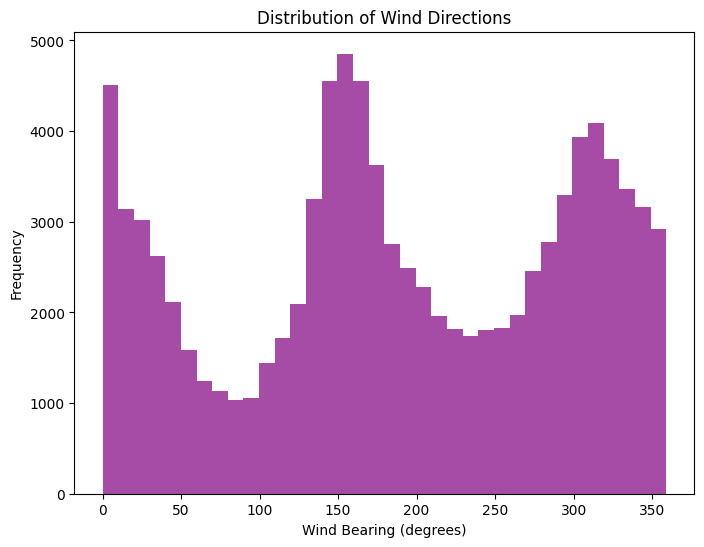

In [199]:
# Analyze the distribution of wind direction
plt.figure(figsize=(8, 6))
weather_data['Wind Bearing (degrees)'].plot(kind='hist', bins=36, color='purple', alpha=0.7)
plt.title('Distribution of Wind Directions')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Frequency')
plt.show()

There are noticeable peaks around 0° (north) and 180° (south), indicating that winds from the north and south are more frequent in Szeged.
Similarly, there is another smaller peak around 270° (west).

The directions between the main cardinal directions (e.g., 45°, 135°, etc.) have relatively lower frequencies.

The histogram appears to show a somewhat symmetric pattern, which suggests that winds come from opposite directions (north-south and east-west) fairly evenly.

### 5.6 Daily Visibilty Trends

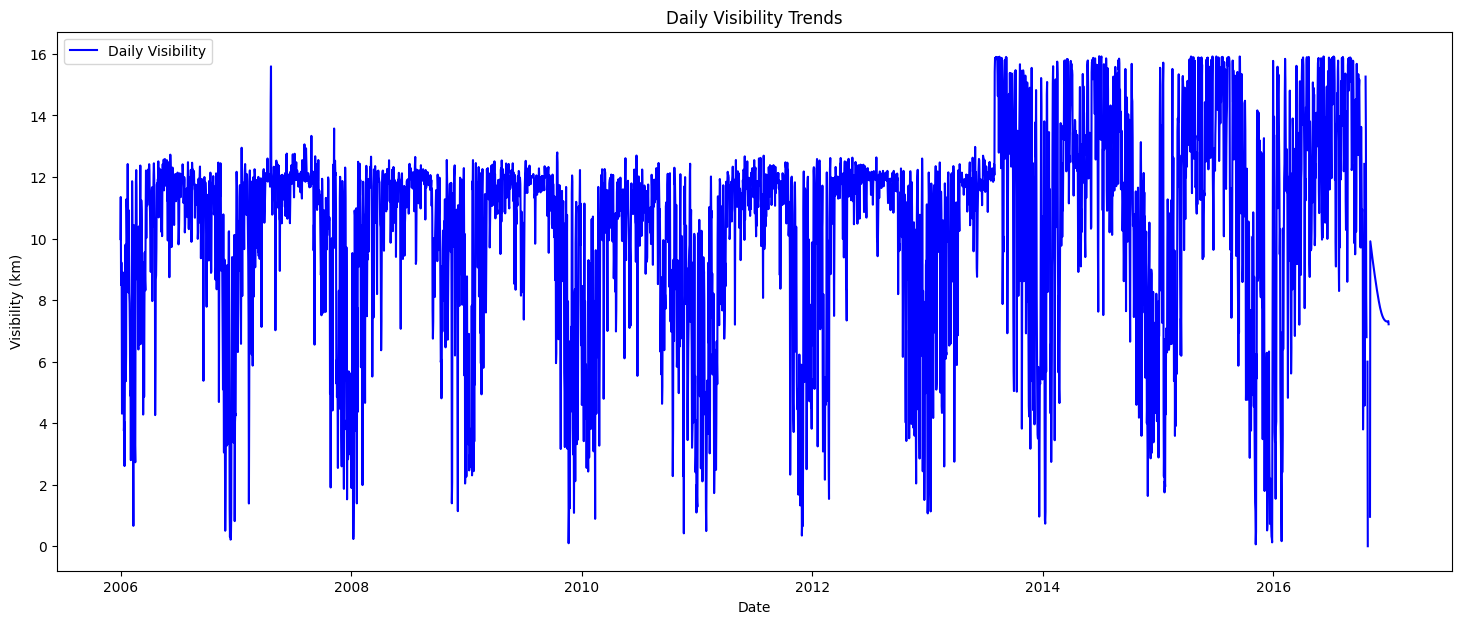

In [139]:
# Plot Visibility trends
daily_visibility = weather_data['Visibility (km)'].resample('D').mean()
plt.figure(figsize=(18, 7))
plt.plot(daily_visibility, label='Daily Visibility', color='blue')
plt.title('Daily Visibility Trends')
plt.xlabel('Date')
plt.ylabel('Visibility (km)')
plt.legend()
plt.show()

In [140]:
# Correlation with Temperature
correlation_visibility = daily_temp.corr(daily_visibility)
print(f"Correlation between Temperature and Visibility: {correlation_visibility:.2f}")

Correlation between Temperature and Visibility: 0.58


There is a moderate positive correlation, indicating that warmer days are generally clearer, with less haze or obstruction to visibility. As temperature increases, visibility tends to improve.

### 5.7 Daily Pressure Trends

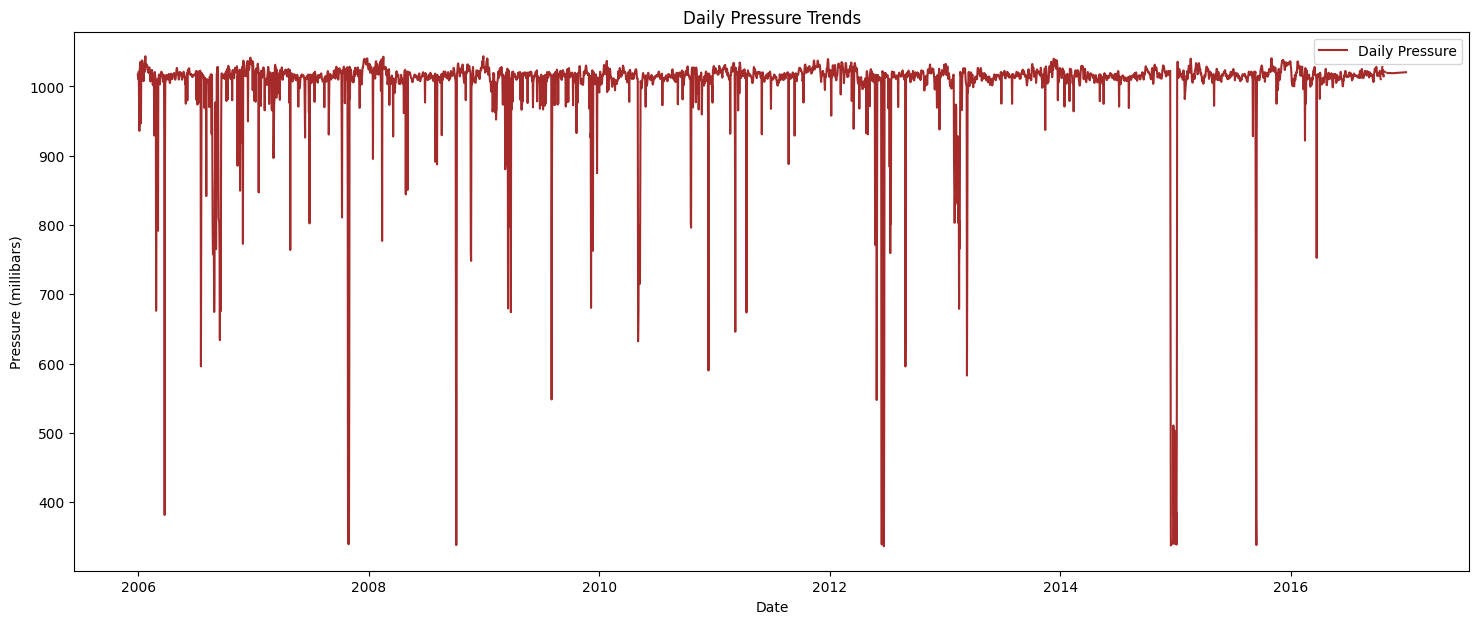

In [200]:
# Plot Pressure trends
daily_pressure = weather_data['Pressure (millibars)'].resample('D').mean()
plt.figure(figsize=(18, 7))
plt.plot(daily_pressure, label='Daily Pressure', color='brown')
plt.title('Daily Pressure Trends')
plt.xlabel('Date')
plt.ylabel('Pressure (millibars)')
plt.legend()
plt.show()

In [142]:
# Correlation with Temperature
correlation_pressure = daily_temp.corr(daily_pressure)
print(f"Correlation between Temperature and Pressure: {correlation_pressure:.2f}")

Correlation between Temperature and Pressure: -0.00


The correlation of -0.00 indicates no linear relationship between temperature and pressure

### 5.8 Frequency of precipitation types

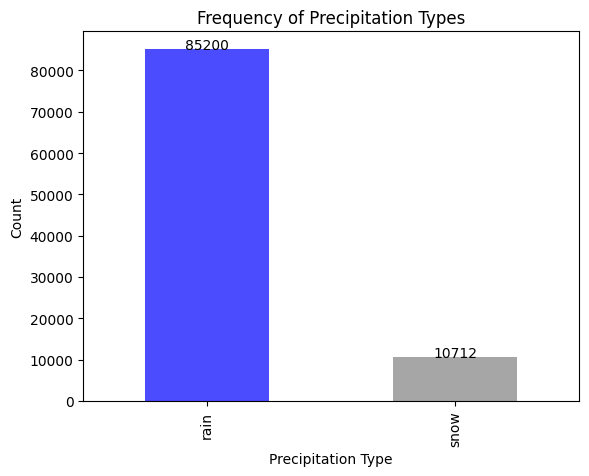

In [143]:
# Analyze the frequency of precipitation types
precipitation_counts = weather_data['Precip Type'].value_counts()
# Plot the bar chart
ax = precipitation_counts.plot(kind='bar', color=['blue', 'gray'], alpha=0.7)
# Add counts on top of bars
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='baseline')

plt.title('Frequency of Precipitation Types')
plt.xlabel('Precipitation Type')
plt.ylabel('Count')
plt.show()

-The high frequency of rain (approximately 89% of precipitation events) indicates that Szeged experiences a climate where rain is the dominant form of precipitation throughout the year.

-Snow occurs much less frequently (about 11%), suggesting that Szeged has milder winters compared to regions where snow is more common.

## 6. Model Training

### 6.1 Standardizing Data

In [165]:
# Separating features and target
X = data[['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 
          'Wind Bearing (degrees)', 'Visibility (km)', 'Cloud Cover', 
          'Pressure (millibars)', 'Year', 'Month', 'Day', 'Hour']]
y = data['Temperature (C)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Ridge regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)

# Printing the coefficients
print("Coefficients:", ridge.coef_)

# Split data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X_standardised, y, test_size=0.2, shuffle=True)

Coefficients: [ 9.34366271e+00 -2.85469626e-01  5.53540300e-01 -4.27884899e-02
  3.36745124e-02  0.00000000e+00 -2.37800848e-02  1.80218299e-02
  1.83473813e-02 -1.74015191e-02  3.94019869e-04]


In [166]:
def train_and_evaluate_model(model):
    # Fit model and use model to predict:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation metrics:
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    
    return model, r2, mse, rmse

### 6.2 Model 1: Ridge Regression

In [167]:
alpha_values = np.arange(0,1.1,0.001)
min_mse = float('inf')
best_model = None

for value in alpha_values:
    ridge = Ridge(alpha=value)
    mse = train_and_evaluate_model(ridge)[2]
    
    if mse < min_mse:
        min_mse = mse
        best_model = ridge

min_mse, best_model

(0.8960777055563667, Ridge(alpha=1.099))

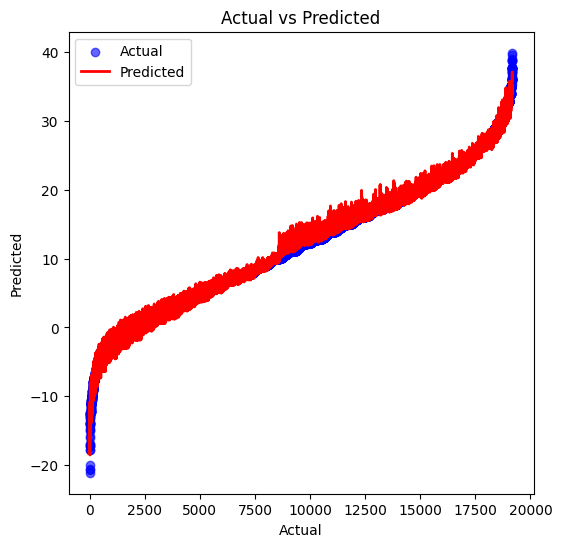

In [172]:
ridge = best_model
train_and_evaluate_model(ridge)

# Visualize the results:
y_pred = ridge.predict(X_test)

# Sort data for line plot
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

f, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

# Plot actual values as points
ax.scatter(range(len(y_test_sorted)), y_test_sorted, color='blue', label='Actual', alpha=0.6)

# Plot predicted values as a line
ax.plot(range(len(y_pred_sorted)), y_pred_sorted, color='red', label='Predicted', linewidth=2)

# Add legend
ax.legend()
plt.show()

In [173]:
# Printing the coefficients
b0 = float(ridge.intercept_)
coeff = pd.DataFrame(ridge.coef_, X.columns, columns = ['Coefficient'])
print("Intercept:", float(b0))
print(coeff)

Intercept: 11.93665336625271
                          Coefficient
Apparent Temperature (C)     9.344941
Humidity                    -0.287555
Wind Speed (km/h)            0.551040
Wind Bearing (degrees)      -0.044650
Visibility (km)              0.032974
Cloud Cover                  0.000000
Pressure (millibars)        -0.022664
Year                         0.019181
Month                        0.019551
Day                         -0.015641
Hour                        -0.001897


### 6.3 Model 2: Decision Tree

In [149]:
#splitting data into tragining and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Creation of the pipeline
pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', DecisionTreeRegressor(random_state=42))])

In [150]:
def train_and_evaluate_model(model):
    # Fit model and use model to predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation metrics
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared: {r2}")
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    
    rmse = mse**0.5
    print(f"Root Mean Squared Error: {rmse}")
    
    # Sort the data for better visualization with a line plot
    sorted_indices = np.argsort(y_test)
    y_test_sorted = y_test[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]
    
    # Visualize the results
    f, ax = plt.subplots(figsize=(7, 5))
    ax.set_title('Actual vs Predicted')
    ax.set_xlabel('Index (sorted by actual values)')
    ax.set_ylabel('Values')
    
    # Plot actual and predicted values
    ax.plot(range(len(y_test)), y_test_sorted, label='Actual', color='blue', linewidth=2)
    ax.plot(range(len(y_pred)), y_pred_sorted, label='Predicted', color='red', linestyle='--', linewidth=2)
    
    ax.legend()
    plt.show()
    
    return model

R-squared: 0.9999262515168081
Mean Squared Error: 0.00676362269061534
Root Mean Squared Error: 0.0822412468936077


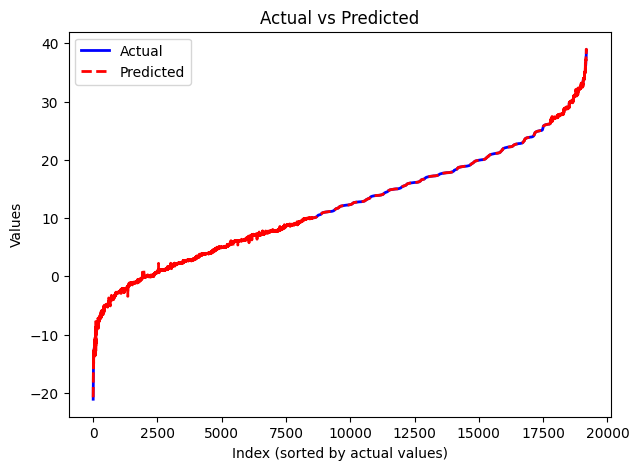

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [151]:
train_and_evaluate_model(pipeline)

#### 6.3.1 Without pipeline

In [152]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor()
regr_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [153]:
y_pred = regr_tree.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  0.08516068038073803


### 6.4 Model 3: Support Vector Regression

In [154]:
# Select features and target variable
features = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)', 'Visibility (km)']
target = 'Temperature (C)'

In [155]:
X = weather_data[features]
y = weather_data[target]

In [156]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [158]:
# Initialize and train the SVR model with RBF kernel
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

SVR()

In [159]:
# Predict on training and testing data
y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

In [160]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

In [161]:
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Training RMSE: 6.12
Testing RMSE: 6.17
R² Score: 0.58


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


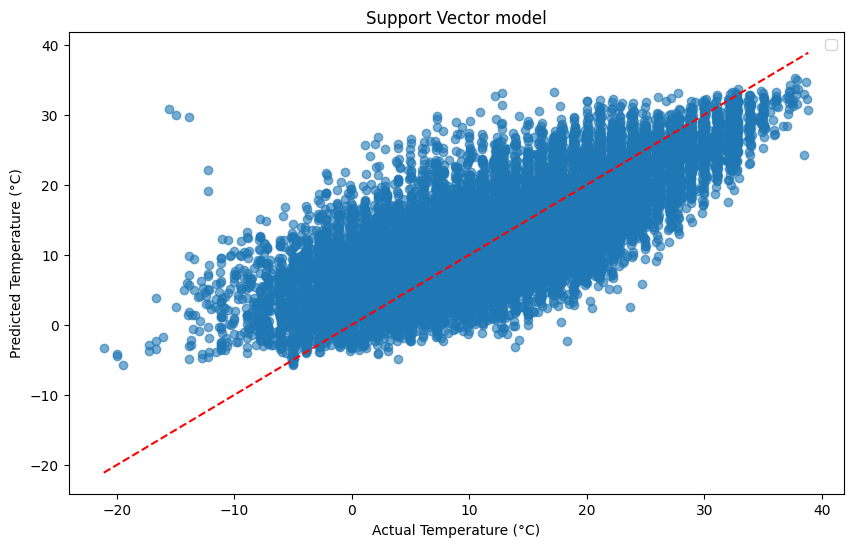

In [164]:
# Plot actual vs predicted temperatures
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Support Vector model')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.legend()
plt.show()

In [183]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(svr, X_test_scaled, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)

# Display feature importance
importance = pd.DataFrame({
    'Feature': features,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance)

                  Feature  Importance
1       Wind Speed (km/h)    4.119924
3    Pressure (millibars)   -0.405329
2  Wind Bearing (degrees)   -0.457544
0                Humidity   -6.007896
4         Visibility (km)   -9.539887


### 6.5 Model 4: Stacking Ensemble

In [174]:
# For clarity, we declare our model list again here 
models = [("Ridge",ridge),("DT",regr_tree),("SVR",svr)]

# Instead of choosing model weightings, we now declare the meta-learner model for our stacking ensemble.  
meta_learner_reg = LinearRegression()

s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)

In [175]:
s_reg.fit(X_train,y_train)

StackingRegressor(estimators=[('Ridge', Ridge(alpha=1.099)),
                              ('DT', DecisionTreeRegressor()), ('SVR', SVR())],
                  final_estimator=LinearRegression())

In [176]:
y_pred = s_reg.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  0.08547525001670304


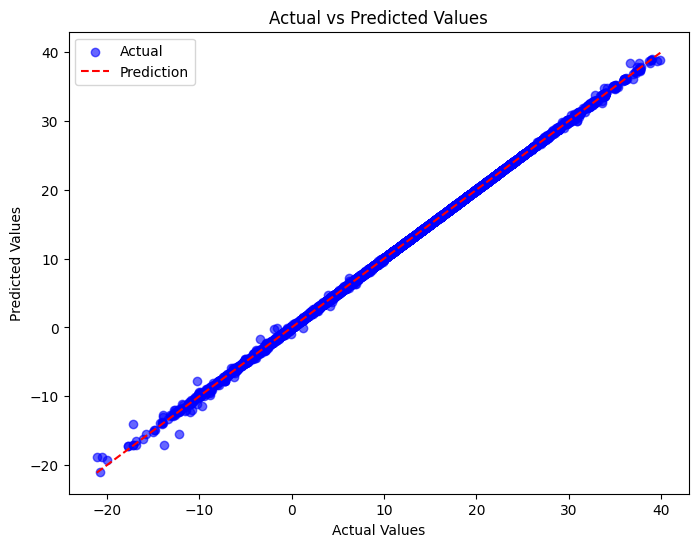

In [182]:
# plot the stacking regression prediction line over data
x_feature = X_train["Apparent Temperature (C)"]

# Generate x_domain for predictions
x_domain = np.linspace(x_feature.min(), x_feature.max(), 100).reshape(-1, 1)

#y_pred_rescaled = y_scaler.inverse_transform(s_reg.predict(x_domain).reshape(-1, 1))
#x_rescaled = x_scaler.inverse_transform(x_domain) 

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

## 7. Conclusion & Insights

### Model 1: Ridge Regression:
It has been determined that the best ridge regression model had an alpha of 1.099. Which gave an MSE of 0.8961 and thus having an RMSE of 0.9466 degrees. 
This means on average the model is off by around 0.95 degrees ie +- 1 degree C which can be argued as relatively accurate. 

From the graph, we can see that there are certain areas where the model predicts particularly well. From about -20 to -10, there are quite accurate predictions as well as around the 5-10 degree C mark and also in the high temperatures. The rest seem to have a larger range and don't predict as well.
From inspection of the coefficients we see that the apparent temperature has the largest influence on temperature and this is to be expected where a 1 unit increase in the scaled apparent temp leads to on average 9.34 degrees C increase in temperature.
e


### Model 2: Decision Tree:With an R2 of 0.9999, an RMSE of 0.0822 and an MSE of 0.0068 we can say that this model seems highly accurate. On average the model is 0.0822 degrees wrong when it comes to predicting which is highly accurate. Couple that with 99.99% of the variation in temperature being explained by the model it is highly accurate.

From the graph we can see that the actual and predicted values are extremely close thus showing a highly accurate model. Caution should be expressed though because decision trees are known for overfitting and so a comparison between training rmse and test rmse is extremely important.
However, these models are known for overfitting. Thus precautions must be taken when using this model to predict.
t.
 MSE.

### Model 3: Support Vector Regression:With an R2 of 0.58 and an RMSE of 6.17 it does not seem like this model is an accurate one. An R2 value of 0.58 means that only 58% of the variance in temperature is explained by the model while an RMSE of 6.17 means that on average the prediction is off by 6.17 degrees which is highly inaccurate.


Judging from the SVR graph, it does not look very accurate at all and thus this would not be a great model to make predictions on. There do not seem to be any accurate areas for predictions in this model.


The top 3 features are Visibility, Humidity and Wind Speed in predicting the temperature.
e.
odel.

### Model 4: Stacking Ensemble:This model looks to be highly accurate.
With an RMSE of 0.0854 meaning that on average the predictions from this model are off by 0.0854 degrees. It can be concluded that the ensemble method of the three other models is a highly accurate one
.

From the graph we can see that the actual and predicted values are matched almost 1-1. With the most accurate temperature range being between 10 and 25 degrees C (as it is tightly centered around the 45 degree line). The rest while still highly accurate does deviate slightly indicating that there are slight discrepancies for predictions in those temperature ranges.
s.
nges.

### Conclusion and Model Recommendation:Clearly Models 2 and 4 are the best performing both with very low RMSE's and high R2 values.
However because the Decision Tree model is overfitting, to put all eggs in one basket and only use a decision tree to make predictions might not be a clever idea. It is for this reason that we recommend the Stacking Ensemble model. The ensemble model will combine the the best characteristics about all three models (like the SVR's fitting) which reduces the possible risk of overfitting.

This allows the model to not overfit as much but to retain the predicting power of the best modes.
ng.

## 8. References

The dataset used in the analysis can be found on Kaggle. [Weather in Szeged 2006-2016](https://www.kaggle.com/datasets/budincsevity/szeged-weather)